## 1.在Python中是如何管理内存的？

答：

由于Cpython是使用最广泛的Python实现（解释和编译），因此本解答为Cpython的内存管理器机制。
较完整的内容可参考我的笔记：https://nbviewer.jupyter.org/github/xiaoniaoyouhuajiang/ClassNotebook/blob/main/interview/Python%E7%9A%84%E5%86%85%E5%AD%98%E7%AE%A1%E7%90%86%E6%9C%BA%E5%88%B6.ipynb

## 2.迭代器和生成器的区别

答：

迭代器一般指可迭代对象。从**迭代器协议**出发，迭代器协议指对象的实现中提供了**next特殊方法**，使得该函数能够迭代自身容器中的下一项或是引起StopIteration异常终止迭代。而可迭代对象等价于**实现了迭代器协议**的对象。Python内置的容器类数据结构，如list,dict等都实现了迭代器协议，因此属于可迭代对象。

而对于迭代器，我们可以用for循环,sum,min,max等函数对容器内的内容进行访问。

而生成器，就像是一个惰性的迭代器，实现了延迟操作，在需要的时候才产生结果，而不是立即产生结果。

Python中有两种方式可以生成一个生成器。
* 生成器函数：函数定义不变，只是使用yield替代return关键字，使得每次返回一个结果，并挂起函数状态。下次再进行调用则在上次离开时的地方继续。
* 生成器表达式：语法上类似于容器推导（如列表推到），但返回的结果是一个generator对象，并能被next()函数调用。

应用如：

```python
def get_primes():
    candidate = 2
    found = []
    while True:
        if all(candidate % prime != 0 for prime in found):
            yield candidate
            found.append(candidate)
        candidate += 1
        
primes = get_primes()
# <generator object get_primes at 0x00000223FE1B17C8>

next(primes), next(primes)
# (2, 3)
```

其他应用还包括对于大数据量的计算，如：

```python
sum(i for i in range(10000000000))
```
生成器是Python一个比较有特色的内容，其优点是保存了迭代的中间状态，可应对一些特殊场景。

## 3.使用lambda函数实现两数相乘
答：

```python
f = lambda x,y: x*y
f(2,4)
# 8
```

## 4.Python中的闭包是什么
答：

Python中函数是一等公民，能够被作为参数传递。另一方面，也可以实现高阶函数，而闭包指的就是函数嵌套中的内层函数，假设调用函数A，函数A中嵌套了函数B，这样函数B就可以引用函数A中域的变量，从而实现闭包的调用。这个特性非常有用，其体现的是将函数作为一种可调用对象的思想，下面给出一个我认为比较有用的例子：

```python
def compose(*funcs):
    """
    compose(f,g,...) == f(g...(x))
    """
    def inner(data, funcs = funcs):
        result = data
        for f in reversed(funcs):
            result = f(result)
        return result
    return inner
```

正如注释所言，通过inner逻辑调用*func，我们实现了compose(f,g,...) == f(g...(x))


## 5.django,flask,tornado框架比较？

* django

django大而全，自身提供了较齐全的工具链。包括ORM,template,甚至还有像Django Cache这样的缓存工具。相比于其他两个框架，其开发效率相对高，但相对而言，可定制性较差，很多时候是框架限制了开发。

* flask

flask在灵活性上的优势是最强的，同时也是轻量化的web框架，其源码的第一个release代码量（不包测试）只有500多行。另一方面，其路由设定使用装饰器，较方便快捷。比起django，flask耦合度较低，因为他的其他组件大多是自己开发或是来源于第三方的开发，有非常高的灵活度。但对于大型网站，其路由映射规则需要单独设模块设置，否则容易混乱。

* tornado

tornado的最大特点是其异步非阻塞的特性，这个特性应对IO密集型和多任务处理上有非常大的优势。tornado注重性能，由于其请求处理是基于回调的非阻塞调用，因此并发性能较好。同时内置了http服务器，其模型是单线程异步网络，会根据CPU数量运行多个实例。比起flask,django，tornado最大的优势就是在并发数较高时有比较好的表现。



## 6.谈谈对restful规范的认识

restful是一种http api的一种规范，其最初是一篇论文中提出的接口设计原则，现阶段人们讨论的restful已和最初论文中的思想不一致（作者本人也提到了），我认为restful体现的是4个web api接口设计的原则：

* C-S架构：数据存储在server,Client只需使用，两端彻底分离。
* 无状态：HTTP请求本身就是无状态的，每一次请求都必须带上所有信息，且两端之间不会记录任何状态。
* 统一的接口：简单来说，接口的设计必须有统一性。这样才能提高接口的可读性。
* 一致的数据格式： 服务端只返回三种信息：Json/XML/状态码。

其中接口的设计规范内容较多，此处不展开，可参考我的笔记：https://nbviewer.jupyter.org/github/xiaoniaoyouhuajiang/ClassNotebook/blob/main/web_api_design/API_design.ipynb

## 7.从在浏览器地址中输入域名到数据返回发生了什么？
发生了：

1.浏览器会完成地址解析，HSTS，检查缓存等操作，如解析没有异常，存在缓存则直接使用缓存则直接返回缓存，没有则将请求通过OS再通过网卡等硬件转化为电信号向远端发起请求。

2.紧接着是DNS查询，浏览器有DNS缓存，如果发现DNS不在缓存中，则交由OS，首先查看是否存在HOSTS文件中，没有则向本地DNS服务器发送查询请求，再又本地DNS服务器转发到多个互联网根域，最终获得IP地址。

3.获取到IP则要进行连接。注意，浏览器会将请求报文封装好后给远端服务器接收并解封装，这个封装与解封装过程为可逆过程。TCP/IP模型下，首先应用层将HTTP数据给传输层，并在外层包上TCP首部信息，到网络层则包装上IP首部信息，到链路层则一般包上以太网的首部信息。

4.客户端和服务端的传输层会发起一条TCP链接来传输网络包，TCP/IP经3次握手便可传输信息。

5.服务端则以相同的方式发送数据回客户端，客户端收到数据解封装，然后浏览器内核渲染界面。

## 8.TCP协议的三次握手，以及四次挥手的过程与必要性

开始时，客户端处于Closed状态，服务端处于 Listen状态。
* 第一次握手：客户端给服务端发送SYN报文，并指定初始化序列号ISN（C）。首部同步位SYN = 1，初始序列号seq=x。
* 二次握手：服务端接收到SYN报文，会以自己的SYN报文作为应答，并指定自己的初始化序列号ISN（S），同时设ACK为ISN（C） + 1，用于表明自己接收到了客户端的SYN。
* 三次握手：客户端收到 SYN 报文之后，会发送一个 ACK 报文，当然，也是一样把服务器的 ISN + 1 作为 ACK 的值，表示已经收到了服务端的 SYN 报文，此时客户端处于 ESTABLISHED 状态。服务器收到 ACK 报文之后，也处于 ESTABLISHED 状态，此时，双方已建立起了连接。

挥手过程：
* 第一次挥手：客户端发送一个 FIN 报文，报文中会指定一个序列号。此时客户端处于 FIN_WAIT1 状态。
* 第二次挥手：服务端收到 FIN 之后，会发送 ACK 报文，且把客户端的序列号值 +1 作为 ACK 报文的序列号值，表明已经收到客户端的报文了，此时服务端处于 CLOSE_WAIT 状态。
* 第三次挥手：如果服务端也想断开连接了，和客户端的第一次挥手一样，发给 FIN 报文，且指定一个序列号。此时服务端处于 LAST_ACK 的状态。
* 第四次挥手：客户端收到 FIN 之后，一样发送一个 ACK 报文作为应答，且把服务端的序列号值 +1 作为自己 ACK 报文的序列号值，此时客户端处于 TIME_WAIT 状态。

### 意义
* 握手

第一次握手：客户端发送网络包，服务端收到了。这样服务端就能得出结论：客户端的发送能力、服务端的接收能力是正常的。第二次握手：服务端发包，客户端收到了。这样客户端就能得出结论：服务端的接收、发送能力，客户端的接收、发送能力是正常的。不过此时服务器并不能确认客户端的接收能力是否正常。第三次握手：客户端发包，服务端收到了。这样服务端就能得出结论：客户端的接收、发送能力正常，服务器自己的发送、接收能力也正常。因此，需要三次握手才能确认双方的接收与发送能力是否正常。

* 挥手

因为当服务端收到客户端的SYN连接请求报文后，可以直接发送SYN+ACK报文。其中ACK报文是用来应答的，SYN报文是用来同步的。但是关闭连接时，当服务端收到FIN报文时，很可能并不会立即关闭SOCKET，所以只能先回复一个ACK报文，告诉客户端，“你发的FIN报文我收到了”。

## 9.如何解决以及排查Linux服务器出现的大量CLOSE_WAIT问题？简述CLOSE_WAIT出现原因？
答：

CLOSE_WAIT表示与客户端建立的连接被动关闭会提示的一种状态。因为linux分配给一个用户的文件句柄是有限的，而TIME_WAIT和CLOSE_WAIT两种状态如果一直被保持，那么意味着对应数目的通道就一直被占用，一旦达到句柄数上限，新的请求就无法被处理了，接着就是大量Too Many Open Files异常，WEB服务崩溃
。

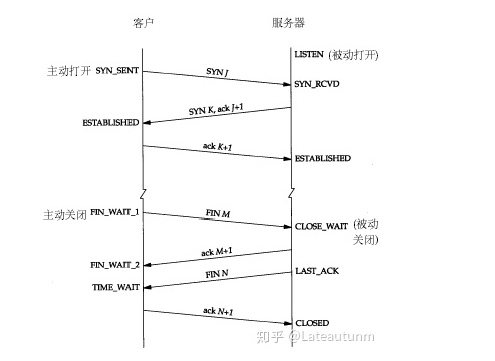

根据套接字连接过程可知，客户端关闭连接之后，服务端的程序没有发出ack信号，导致这种结果的原因为程序没有检测到客户端的关闭。所以我认为出现这种问题只有两种可能：
* server的进程在接收到FIN的信号后，“忘记”了如何关闭连接
* server没有接收到ack信号

不管是哪种情景，都需要查看server源代码进行排查。同时要根据业务情景判断关闭哪些可以关闭的运行时。

## 10.什么是线程和进程，有什么区别？
答：

首先要明确进程是资源分配的最小单位，线城市CPU调度的最小单位。本质上来说，线程和进程都是CPU的工作时间段。
* 线程是在进程下进行
* 一个进程可以包含多个线程
* 进程生成时会被分配一部分的内存资源，进程间的数据难以共享，每个进程要做好对自身资源的管理。
* 一个进程中的不同线程则能够共享内存，同时也可以给内存上锁，使得一个线程使用内存时，其他线程必须等待它的操作结束才可读取内存。
* 要注意Linux系统下线程看作共享数据的进程，不做其他特殊看待，而其他的操作系统则区分对待线程和进程。

## 11.线程间的常用通信方法？
答：

一个进程中的不同线程可以直接共享内存。
如果说是不同进程里的线程想要进行数据共享，则必须依赖进程间的通信，而进程间的通信本质都是在内核空间中开一块缓冲区，一方存入，一方读取的方式进行通信，其中包括：
* 管道
* 命名通道
* 消息队列
* 信号量
* 共享内存方法

## 12.有3个线程，打印1到100的素数，要求线程1，2，3顺序打印素数
```python
# 第二题的时候已经写了一个生成质数的迭代器，这里复用get_primes()函数
import threading
con = threading.Condition()

prime = get_primes()
primes = [next(prime) for i in range(100)]

def work():
    global primes
    con.acquire()
    while True:
        print(primes[0])
        primes = primes[1:]
        if primes[0] > 100:
            break
        con.notify()
        if primes[2] >= 100:
            break
        con.wait()
    con.release()


t1 = threading.Thread(target = work)
t2 = threading.Thread(target = work)
t3 = threading.Thread(target = work)
t1.start()
t2.start()
t3.stary()
t1.join()
t2.join()
t3.join()
```

## 13.ORM是什么？有什么用？
答：

ORM是对象关系映射（Object Relational Mapping），是一种用于与数据库进行交互的框架，一般在后端接口设计中用于将数据库的查询等逻辑转化为面对对象的逻辑从而规范使代码变得更加规范。

ORM的作用：
* 让代码和逻辑更加统一
* 防止注入攻击
* 个人认为在进行数据库数据的复杂数据分析时，用原生SQL语句会更加便利。
* 数据库连接层的解耦

## 14.SQLALchemy操作数据库的基本步骤有哪些？
答：

### 基本的SQL支持：
* 模型定义（schemas）

```python

# coding=utf-8
from __future__ import unicode_literals, absolute_import
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, DateTime
ModelBase = declarative_base() #<-元类

class User(ModelBase):
    __tablename__ = "auth_user"

    id = Column(Integer, primary_key=True)
    date_joined = Column(DateTime)
    username = Column(String(length=30))
    password = Column(String(length=128))

```
* 增添数据

```python
with get_session() as session:
    session.add(User(username="asd", password="asd"))
    session.add(User(username="qwe", password="qwe"))
    session.commit()

```
* 查询数据

```python
with get_session() as session:
    # <class 'sqlalchemy.orm.query.Query'>
    session.query(User)
```
* 复杂查询

```python
# 子查询
with get_session() as session:
    # <class 'sqlalchemy.orm.query.Query'>
    query = (session
            .query(User.id)
            .filter(User.username == "asd")
            .filter_by(username="asd")
            .limit(10)
            )
    subquery = query.subquery()
    query2 = session.query(User).filter(
        User.id.in_(subquery)
    )
    print query2#<-打印展开成的SQL，此处没有SQL查询

```
* 删除数据

```python
with get_session() as session:
    query = (session
             .query(User)
             .filter(User.username == "asd")
             .filter_by(username="asd")
             .join(Addreess)
             .join(Addreess,Addreess.user_id=User.id)
             .limit(10)
             .delete()#<-这里
             )

```
* 改动数据

```python
with get_session() as session:
            # get by id
    query = (session
             .query(User)
             .filter_by(id=1)
             .update({"username": 
                     User.username + "a"},
                     synchronize_session=False)
                     )

```

### 事件，应用层的触发器（trigger）：
* ConnectionEvents-连接后的自检
* DDLEvents-增删改查事件
* DialectEvents-不同种类数据库的事件
* PoolEvents-连接池时间



## 15.数据库隔离级别有哪些？各自的含义是什么？MYSQL默认的隔离级别是什么？
答：

* Read Uncommitted（读取未提交内容）在该隔离级别，所有事务都可以看到其他未提交事务的执行结果。
* Read Committed（读取提交内容）最基础的隔离：一个事务只能看见已经提交事务所做的改变。
* Repeatable Read（可重读）这是MySQL的默认事务隔离级别，它确保同一事务的多个实例在并发读取数据时，会看到同样的数据行。
* Serializable（可串行化）在每个读的数据行上加上共享锁。在这个级别，可能导致大量的超时现象和锁竞争。


## 16.介绍一下数据库索引的实现原理，以及什么情况下索引会失效？
答：

### 实现原理
* B+树
尽量保持树的平衡，降低树的度树（树查找算法的IO操作数量和树的度树直接相关）。使得查询效率提高。
* 散列索引（Hash表）
通过散列函数用来定位索引，将索引项放入到不同的桶中，每次查询可通过计算散列定位桶。

### 索引失效
* 条件查询中条件带有"or,!=,<>,not in, not"字段
* 模糊查询时使用通配符
* 多字段索引查询条件中不包含第一列
* 多字段b+tree索引查询条件中使用"or"


## 17.在Python中,list，tuple，dict，set有什么区别，主要应用在什么场景？
答：

* 除了tuple，其他数据类型的内容皆可变，而tuple则为不可变的数据结构。
* list应用广泛，其最接近的抽象形式是链表。自带索引，提供了丰富的接口，应对计算非密集型任务时，其内容类型的自由提供了很大便利。而当数据存储量较大或遇计算密集型任务时，可用numpy.array进行代替。
* dict则是灵活的键值对，其底层算法对查询进行优化，是查询速度最快的数据结构。由于使用了哈希算法作为底层实现，因此其键值不仅要保证唯一，还需保证可哈希("hashable")。
* 与set最接近的抽象形式为数学意义上的集合。因此必须要保证其内置元素的唯一性。另一方面，set与其他数据结构不同之处在于其不可索引（因为元素无序），但可以用set()方法生成某个容器的集合使其保持元素唯一性，且用"a in set"等方法查看集合中是否包含某元素

## 18.list底层数据结构和实现原理？
答：
```c
typedef struct {
    PyObject_HEAD
    Py_ssize_t ob_size;

    /* Vector of pointers to list elements.  list[0] is ob_item[0], etc. */
    PyObject **ob_item;

    /* ob_item contains space for 'allocated' elements.  The number
     * currently in use is ob_size.
     * Invariants:
     *     0 <= ob_size <= allocated
     *     len(list) == ob_size
     *     ob_item == NULL implies ob_size == allocated == 0
     */
    Py_ssize_t allocated;
} PyListObject;
```
list是cpython实现的动态数组，初始化时其内存空间已被预分配。因此数组的大小可以动态地扩展。
每次超出范围需要resi

```c
new_allocated = (newsize >> 3) + (newsize < 9 ? 3 : 6);
new_allocated += newsize;
```


## 19.dict的底层数据结构和实现原理?
答：

这里说的是Python3.5后的dict实现（比起之前的版本更有效率且减小了内存损耗）。
首先Cpython的哈希函数hash()是用来计算存储值的哈希值的。初始化一个新的字典，则当前运行时，C上会生成两个数据，一个是一个长度为8的一维数组（此时数组内的元素全部为None），另一个是一个空二维数组。当填充数据时，如"dict['a'] = 1"，则计算hash('a') % 8值 = index1，此时一维数组的第index1位或填充为0，另一方面，二维数组第0位则初始化一个

```C
[[hash('a'),指向'a'的指针，指向1的指针]]
```

所以一维数组的第index1位存储的是index2（即二维数组中对应的索引），继续增添数据则以此类推。这种实现方式使得dict中的数据存储实际位顺序存储且能够被轻松遍历（直接遍历二维数组中的元素）。同时因为这种实现方法位哈希表，因此具有较快的查询速度。

## 20.常见的数据结构和算法有哪些
答：

基本的数据结构包括
* 栈
* 队列
* Deque
* 链表
* 有序列表
* 树（一种特殊的图）
* 图

基本算法包括:
* 排序
* 搜索
* 字符串匹配
* 递归(动态规划）
* 基于树的各类算法
* 基于图的各类算法

## 21.常见的排序算法以及时间复杂度？
答：

|          | 平均时间复杂度 | 最好情况    | 最坏情况    | 空间复杂度 |
| -------- | -------------- | :---------- | ----------- | ---------- |
| 冒泡排序 | O(n^2)         | O(n)        | O(n^2)      | O(1)       |
| 选择排序 | O(n^2)         | O(n^2)      | O(n^2)      | O(1)       |
| 插入排序 | O(n^2)         | O(n)        | O(n^2)      | O(1)       |
| 希尔排序 | O(nlnn)        | O(n(lnn)^2) | O(n(lnn)^2) | O(1)       |
| 归并排序 | O(nlnn)        | O(nlnn)     | O(nlnn)     | O(n)       |
| 快速排序 | O(nlnn)        | O(nlnn)     | O(n^2)      | O(nlnn)    |
| 堆排序   | O(nlnn)        | O(nlnn)     | O(nlnn)     | O(1)       |

## 22.系统中需要大量唯一，有序递增的ID，如何实现？
答：

* Redis方案
假设一个集群中有5台Redis,则可以设每个机器以不同初值，同步长向后递增生成ID
> A：1, 6, 11, 16, 21
B：2, 7, 12, 17, 22
C：3, 8, 13, 18, 23
D：4, 9, 14, 19, 24
E：5, 10, 15, 20, 25

* Snowflake算法
* Mysql的auto_increment
* 美团分布式ID生成器Leaf

## 23.单元测试包含哪几种？单元测试中常用的测试方法有哪些？
答：

单元测试根据其覆盖种类可分为：
* 语句覆盖：设计若干测试用例，使得每一句可执行语句至少执行一次
* 判定覆盖：覆盖程序中的每个真假分支
* 条件覆盖：覆盖每个判断条件
* 判定、条件覆盖：设计足够的测试用例，运行所测程序，使程序中每个判断的每个条件的每个可能取值至少执行一次，并且每个可能的判断结果也至少执行一次。
* 条件组合测试：设计足够的测试用例，运行所测程序，使程序中每个判断的所有条件取值组合至少执行一次。
* 路径测试：设计足够的测试用例，运行所测程序，要覆盖程序中所有可能的路径。



## 24.有一个读取产品数据的HTTP协议API，如何测试该API性能？
答：

可以使用api性能测试工具如http_load，wrk（unix系系统专用）进行测试。
一般通过模拟
* 访问用户进程数量
* 总共的访问次数
* 每秒的访问频率
* 总计访问事件
等参数进行压力测试。测试完成后得到的主要指标**服务器每秒响应的查询次数**应该作为API性能的指标参数。

另一方面，我们还需要用运行时分析工具去分析程序运行时的cpu,men等指标同步进行分析，这样可以查看API对服务器资源的占有程度，以此来分析是否有必要优化API的实现


## 25.列出常见的设计模式以及应用场景？
答：

* 单例模式——确保一类只有一实例
* 工厂模式——灵活的定义可扩展对象
* 建造者模式——分离复杂对象的构建以及表示两层抽象
* 原型模式——克隆对象，场景：需要动态获取对象的状态
* 适配器模式——将一个类的接口转换成客户希望的另一个接口。一般通过另起一个类进行兼容
* 修饰器模式——修饰器模式通常用于扩展一个对象的功能。

# 代码
## 1.给定两个已经排序的数组A和B。编写一个方法，以顺序排序将B合并到A中。

In [47]:
def merge(la: list, lb:list) -> list:
    # la,lb是两个已经排序好的数组
    tem = []
    while(len(la) > 0) and (len(lb) > 0):
        if la[0] < lb[0]:
            tem.append(la.pop(0))
        else:
            tem.append(lb.pop(0))
    tem += la
    tem += lb
    return tem

## 2.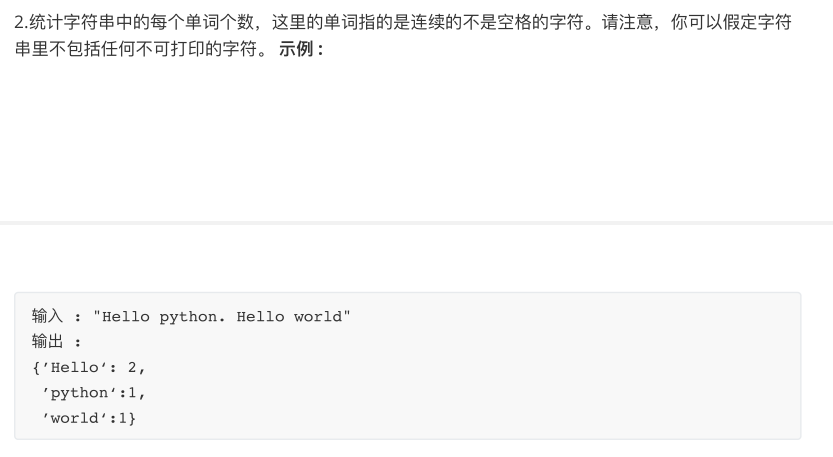

In [37]:
import re

def wordCount(st: str) -> dict:
    index ={}
    for i in re.finditer(r'\w+', st):
        word = i.group()
        column = i.start()+1
        occurrences = index.get(word, [])
        occurrences.append(column)
        index[word] = occurrences
    # 这一步前的index得出的是word以及word为句中第几位的数组
    index = {a:len(b) for a, b in index.items()}
    return index

# 简单调用测试
test = "hello, i am duke, duke。"
wordCount(test)

{'hello': 1, 'i': 1, 'am': 1, 'duke': 2}

## 3.实现最少使用缓存机制的LRU

In [46]:
import collections
 
#基于orderedDict实现
class LRUCache(collections.OrderedDict):
    def __init__(self,size=2) -> None:
        self.size = size
        self.cache = collections.OrderedDict()
 
    def get(self,key) -> int:
        if key in self.cache.keys():
            #因为在访问的同时还要记录访问的次数（顺序）
            value = self.cache.pop(key)
            #保证最近访问的永远在list的最后面
            self.cache[key] = value
            return value
        else:
            value = None
            return -1
 
    def put(self,key,value) -> None:
        if key in self.cache.keys():
            self.cache.pop(key)
            self.cache[key] = value
        elif self.size == len(self.cache):
            self.cache.popitem(last=False)
            self.cache[key] = value
        else:
            self.cache[key] = value
            
# 已通过题目测试

## 4.请实现线程安全的单例模式

In [40]:
import threading

# 给单例上锁，确保有锁的线程调用单例
def synchronized(func):
    func.__lock__ = threading.Lock()

    def synced_func(*args, **kws):
        with func.__lock__:
            return func(*args, **kws)

    return synced_func


# 实现一个单例的装饰器，只要对实体进行装饰即可， 该装饰器确保了只有一个实体存在
def Singleton(cls):
    instances = {}

    @synchronized
    def get_instance(*args, **kw):
        if cls not in instances:
            instances[cls] = cls(*args, **kw)
        return instances[cls]

    return get_instance


def worker():
    single_test = test()
    print ("id----> %s" % id(single_test))


# 用来测试定义的一个类，生成的实体应当为一个
@Singleton
class test():
    a = 1

if __name__ == "__main__":
    task_list = []
    for one in range(30):
        t = threading.Thread(target=worker)
        task_list.append(t)

    for one in task_list:
        one.start()

    for one in task_list:
        one.join()

id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848
id----> 2049932627848


## 5.实现观察者模式

In [44]:
from __future__ import annotations

from contextlib import suppress
from typing import List, Optional


# 定义观察者的泛型，主要是提供一个接口
class Observer():
    def update(self, subject: Subject) -> None:
        pass

# 在定义被观察者时集成该类，attach方法建立依赖
class Subject:
    def __init__(self) -> None:
        self._observers: List[Observer] = []

    def attach(self, observer: Observer) -> None:
        if observer not in self._observers:
            self._observers.append(observer)

    def detach(self, observer: Observer) -> None:
        with suppress(ValueError):
            self._observers.remove(observer)

    def notify(self, modifier: Optional[Observer] = None) -> None:
        for observer in self._observers:
            if modifier != observer:
                observer.update(self)

# 定义被观察者，继承自Subject
class Data(Subject):
    def __init__(self, name: str = "") -> None:
        super().__init__()
        self.name = name
        self._data = 0

    @property
    def data(self) -> int:
        return self._data

    @data.setter
    def data(self, value: int) -> None:
        self._data = value
        self.notify()


# 十六进制输出的观察者
class HexViewer:
    def update(self, subject: Data) -> None:
        print(f"HexViewer: Subject {subject.name} has data 0x{subject.data:x}")


# 十进制输出的观察者
class DecimalViewer:
    def update(self, subject: Data) -> None:
        print(f"DecimalViewer: Subject {subject.name} has data {subject.data}")


def main():
    data1 = Data('Data 1')
    data2 = Data('Data 2')
    view1 = DecimalViewer()
    view2 = HexViewer()
    data1.attach(view1)
    data1.attach(view2)
    data2.attach(view2)
    data2.attach(view1)
    data1.data = 10


if __name__ == "__main__":
    main()

DecimalViewer: Subject Data 1 has data 10
HexViewer: Subject Data 1 has data 0xa


## 6.生产消费者模式

In [53]:
# 想象一个爬虫场景，生产者产生url队列，消费者爬取数据
import time, threading, queue
import requests

class Consumer(threading.Thread):
    # 继承自一个线程
    def __init__(self, queue) -> None: 
        super().__init__()
        self._queue = queue
    
    # 消费
    def run(self) -> None: 
        while True:
            _content = self._queue.get()
            print(_content)
            # 如果信号时quit，则断开
            if isinstance(_content, str) and _content == 'quit':
                break                
            # _res = requests.get(content)(真场景下的run)
            time.sleep(1)
        print('--finish--')

# 辅助函数        
def build_worker_pool(queue, size) -> list: 
    _workers = []
    for _ in range(size):
        _worker = Consumer(queue)
        _worker.start()
        _workers.append(_worker)
    return _workers
        
    
# 消费者，同时为主函数
def Producer() -> None: 
    # 这里的urls是随便写的
    _urls = ['url1', 'url2', 'url3', 'url4']
    _q = queue.Queue()
    workers = build_worker_pool(_q, 4)
    _start_time = time.time()
    for _url in _urls:
        _q.put(_url)
    for _w in workers:
        _q.put('quit')
    for _w in workers:
        _w.join()
    print("Done")
    
if __name__ == '__main__':
    Producer()

url1
url2
url3
url4
quitquit
--finish--

--finish--
quitquit
--finish--

--finish--
Done
